# Unsupervised Learning Residency-4 Project-1 - Car Mpg Case Study

Case Study Description: Car Mpg.

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset:cars-dataset.csv

Attribute Information:
1. Car Name – Name of the car
2. Cyl – No of cylinders in the car – Multivalued discrete
3. Disp – Displacement – continuous
4. Hp – Horsepower – continuous
5. Wt – Weight – continuous
6. Acc – Accleration – continuous
7. Yr – Model of the car – Multivalued discrete

Steps to follow:
1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [1]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

from sklearn.linear_model import LinearRegression

### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [2]:
# load the dataset
df = pd.read_csv('cars-dataset.csv')
print("Shape: ", df.shape)
df.head()

Shape:  (398, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
# drop non-numeric entries such as 'car name' as it is not required for analysis
car_df = df.drop(columns=["car name"], axis=1)
print("Shape: ", car_df.shape)

Shape:  (398, 7)


In [4]:
# remove data having "?"
car_df = car_df.replace('?',np.nan)
car_df = car_df.dropna()
print("Shape: ", car_df.shape)

Shape:  (392, 7)


In [5]:
car_df.isnull().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
cyl     392 non-null int64
disp    392 non-null float64
hp      392 non-null object
wt      392 non-null int64
acc     392 non-null float64
yr      392 non-null int64
mpg     392 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [7]:
# 'hp' is of object type, convert into float64 for analysis
car_df["hp"] = car_df["hp"].astype("float64")
car_df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [8]:
car_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [9]:
# convert all attributes to Z scale 
car_df = car_df.apply(zscore)

### 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

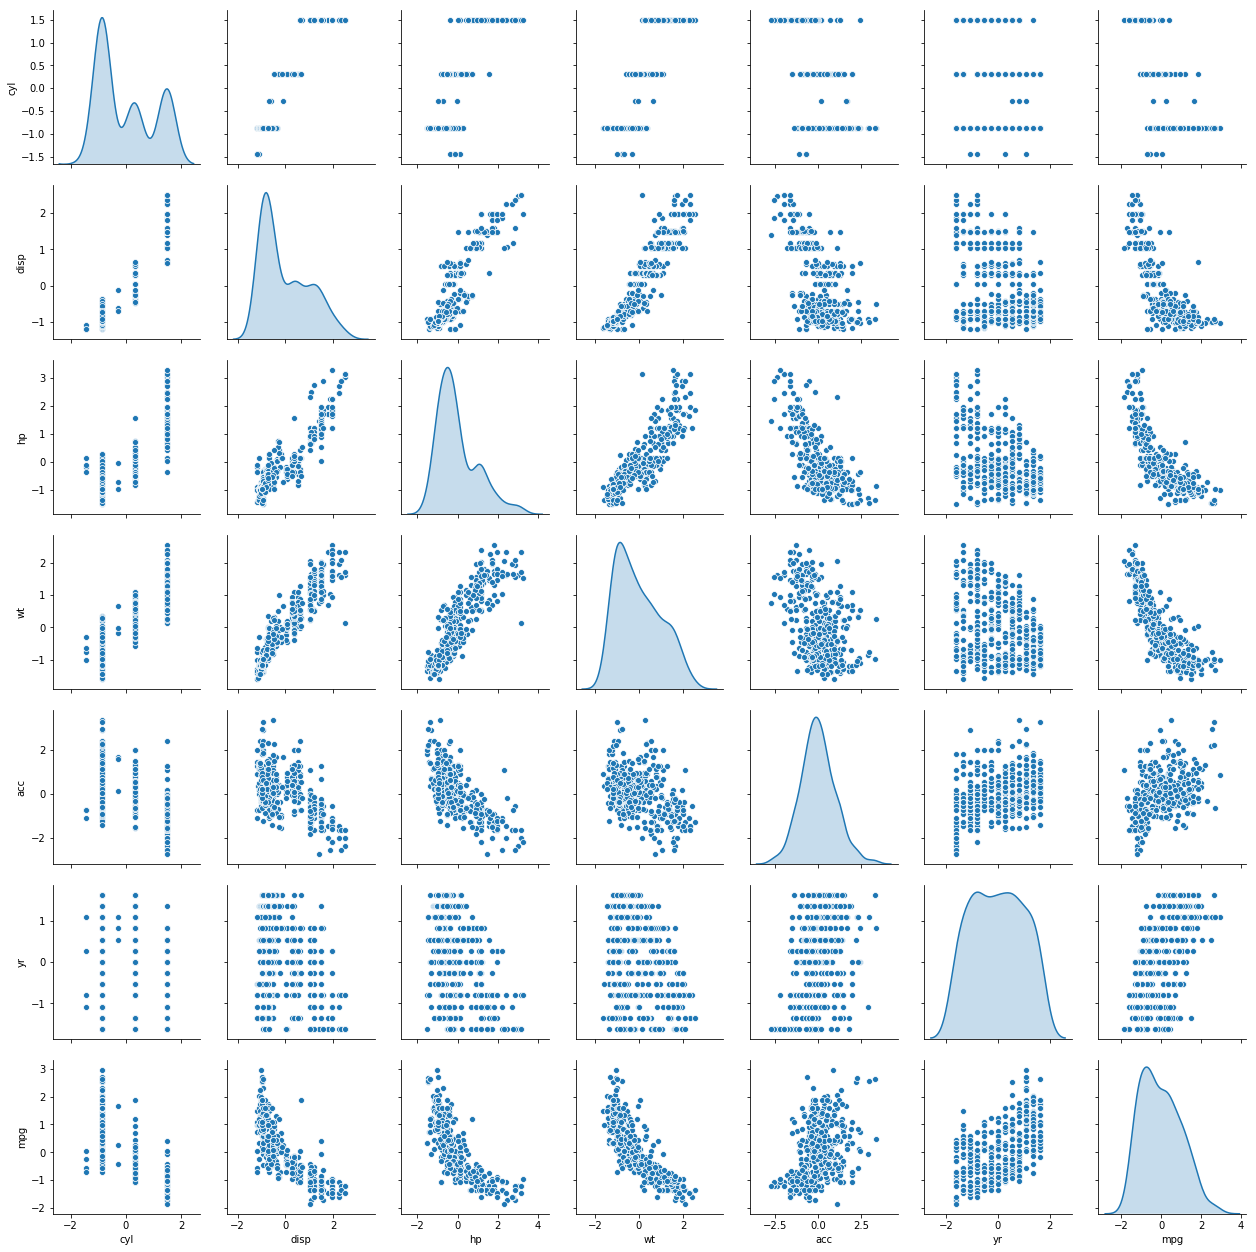

In [10]:
# bivariable analysis
sns.pairplot(car_df,diag_kind="kde")

In [11]:
# cyl has 3 gausian curves. it might be beacuase cyl is Multivalued discrete

### 3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [12]:
cluster_range = range(1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(car_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  

# combine the cluster_range and distortion into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.617487
3,4,725.451273
4,5,655.141633
5,6,585.209457
6,7,533.826866
7,8,489.507324
8,9,459.368213


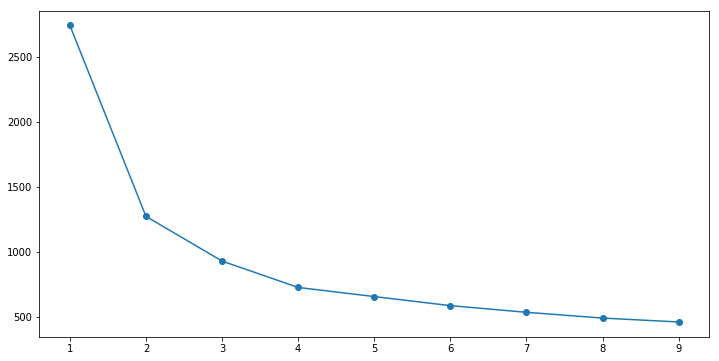

In [13]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(cluster_range, cluster_errors, marker = "o" )

In [14]:
# The elbow plot shows that optimal value of clusters is 3

In [15]:
Z = linkage(car_df, method = "ward")
print("Z shape", Z.shape)

c, coph_dists = cophenet(Z , pdist(car_df))
print("cophenet index: ", c)

Z shape (391, 4)
cophenet index:  0.7682471022485758


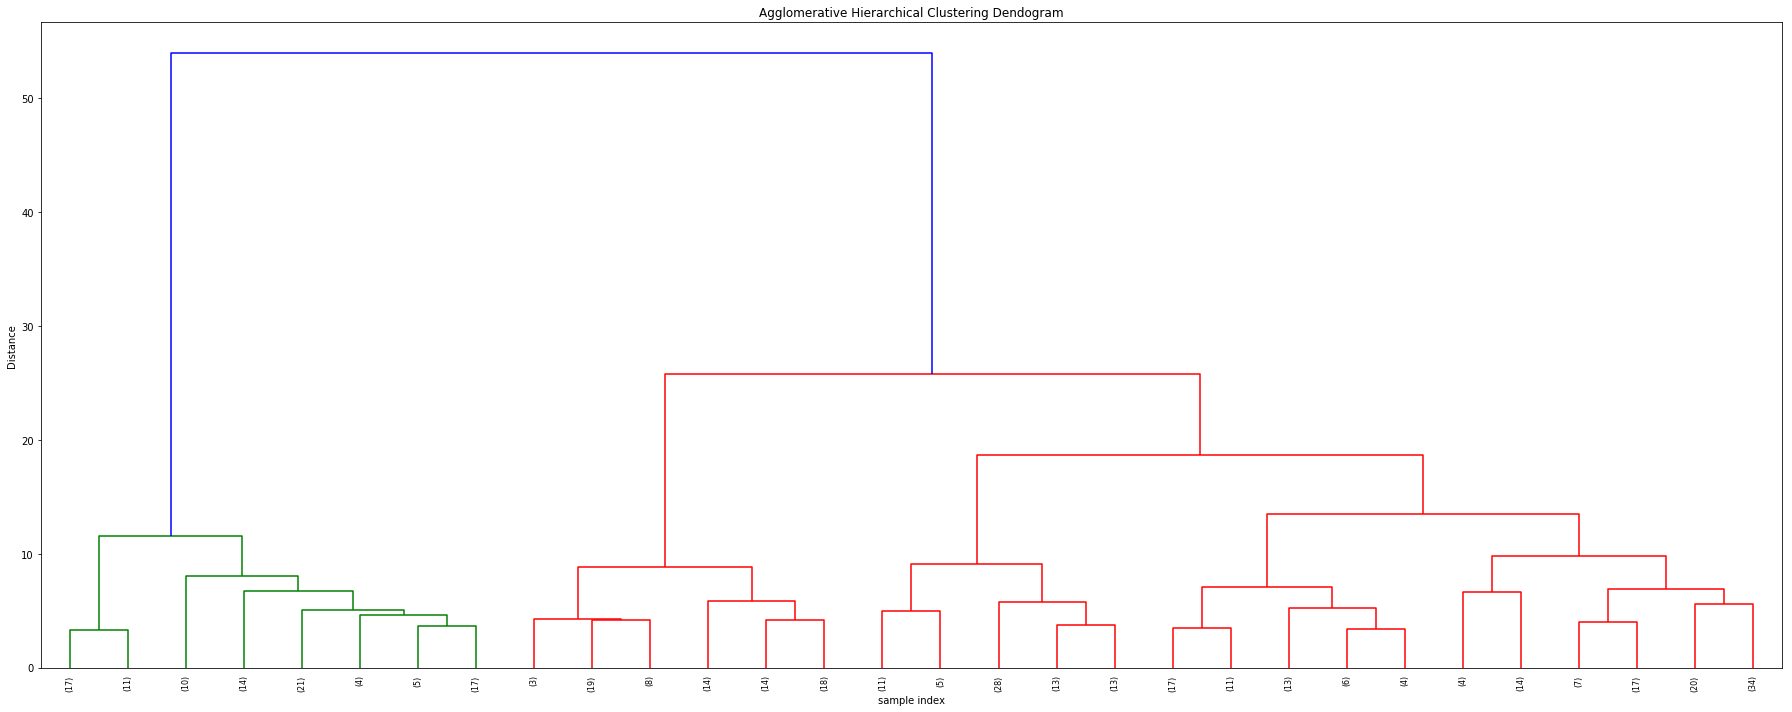

In [16]:
# plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
r = dendrogram(Z,  truncate_mode='lastp', leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

In [17]:
# Form flat clusters from the hierarchical clustering defined by the given linkage matrix.
clusters = fcluster(Z, 25, criterion='distance')
nclusts = np.unique(clusters).shape[0]
print("Number of optimal cluster: ",nclusts)

Number of optimal cluster:  3


In [18]:
# seperate the cluster by adding "cluster" columns in data set.. each data point is tag with repective cluster id
car_df["clusters"] = clusters
car_df.groupby(["clusters"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
clusters,,,,,,,
1,99,99,99,99,99,99,99
2,76,76,76,76,76,76,76
3,217,217,217,217,217,217,217


In [19]:
cluster1_df = car_df[car_df["clusters"]==1]
cluster1_df = cluster1_df.drop('clusters', axis = 1)

cluster2_df = car_df[car_df["clusters"]==2]
cluster2_df = cluster2_df.drop('clusters', axis = 1)

cluster3_df = car_df[car_df["clusters"]==3]
cluster3_df = cluster3_df.drop('clusters', axis = 1)

print("cluster1 size: ",cluster1_df.shape)
print("cluster2 size: ",cluster2_df.shape)
print("cluster3 size: ",cluster3_df.shape)

cluster1 size:  (99, 7)
cluster2 size:  (76, 7)
cluster3 size:  (217, 7)


### 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [20]:
# linear regression on cluster-1
cluster_df = cluster1_df;

X = cluster_df.drop('mpg', axis = 1)
y = cluster_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

cluster1_model = LinearRegression()
cluster1_model.fit(X, y)
cluster1_score = cluster1_model.score(X_test, y_test)

cluster1_coeff = pd.DataFrame(cluster1_model.coef_, columns = ["Coefficients"], index = X.columns)
print("Cluster1 model coefficients: \n\n", cluster1_coeff)

Cluster1 model coefficients: 

       Coefficients
cyl       0.000000
disp     -0.058722
hp       -0.098294
wt       -0.164213
acc      -0.154071
yr        0.190675


In [21]:
# linear regression on cluster-2
cluster_df = cluster2_df;

X = cluster_df.drop('mpg', axis = 1)
y = cluster_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

cluster2_model = LinearRegression()
cluster2_model.fit(X, y)
cluster2_score = cluster2_model.score(X_test, y_test)

cluster2_coeff = pd.DataFrame(cluster2_model.coef_, columns = ["Coefficients"], index = X.columns)
print("Cluster2 model coefficients: \n\n", cluster2_coeff)

Cluster2 model coefficients: 

       Coefficients
cyl       0.536008
disp      0.041506
hp       -0.133760
wt       -0.354898
acc      -0.085771
yr        0.152057


In [22]:
# linear regression on cluster-3
cluster_df = cluster3_df;

X = cluster_df.drop('mpg', axis = 1)
y = cluster_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

cluster3_model = LinearRegression()
cluster3_model.fit(X, y)
cluster3_score = cluster3_model.score(X_test, y_test)

cluster3_coeff = pd.DataFrame(cluster3_model.coef_, columns = ["Coefficients"], index = X.columns)
print("Cluster3 model coefficients: \n\n", cluster3_coeff)

Cluster3 model coefficients: 

       Coefficients
cyl       0.457924
disp     -0.368627
hp       -0.545921
wt       -0.582912
acc      -0.021348
yr        0.404745


In [23]:
print("Cluster-1 score: ",cluster1_score)
print("Cluster-2 score: ",cluster2_score)
print("Cluster-3 score: ",cluster3_score)

print("\n")

print("Cluster-1 model coefficients: ",cluster1_model.coef_)
print("Cluster-2 model coefficients: ",cluster2_model.coef_)
print("Cluster-3 model coefficients: ",cluster3_model.coef_)

Cluster-1 score:  0.7526996066933654
Cluster-2 score:  0.4522985535840085
Cluster-3 score:  0.6675991525371727


Cluster-1 model coefficients:  [ 0.         -0.05872242 -0.0982939  -0.16421348 -0.15407129  0.19067494]
Cluster-2 model coefficients:  [ 0.53600768  0.04150554 -0.1337595  -0.35489813 -0.08577144  0.15205709]
Cluster-3 model coefficients:  [ 0.45792419 -0.36862662 -0.54592073 -0.58291171 -0.02134815  0.40474463]
